# HW 4
## Tim Demetriades
### AAI 646 - B - Hong Man
4/30/2022

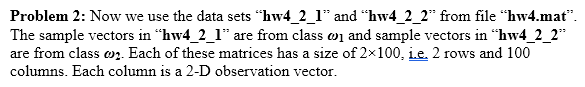

In [1]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt

First the MatLab data is loaded in.

In [2]:
hw4_2_1 = io.loadmat('hw4.mat')['hw4_2_1']
hw4_2_2 = io.loadmat('hw4.mat')['hw4_2_2']

In [3]:
n = len(hw4_2_1.T)

### Part 1

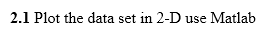

Here the 2D data for each class is plotted.

(-7.0, 6.0)

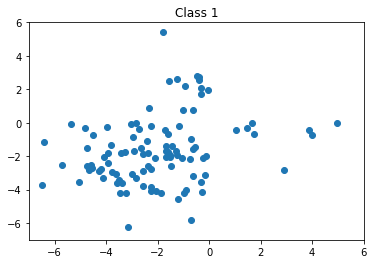

In [4]:
plt.scatter(x = hw4_2_1.T[:, 0], y = hw4_2_1.T[:, 1])
plt.title('Class 1')
plt.xlim([-7, 6])
plt.ylim([-7, 6])

(-7.0, 6.0)

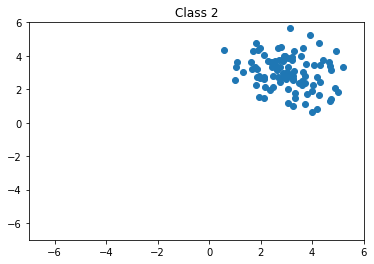

In [5]:
plt.scatter(x = hw4_2_2.T[:, 0], y = hw4_2_2.T[:, 1])
plt.title('Class 2')
plt.xlim([-7, 6])
plt.ylim([-7, 6])

We can see that the 2 classes form 2 somewhat noticable clusters, especially Class 2.

### Part 2

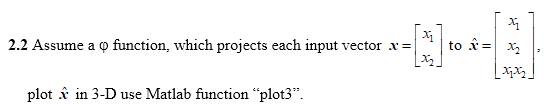

Now the 2D data is first mapped to 3D using the function below.

In [6]:
def mapping_to_3D(x, n):
    x_hat = np.zeros((n, 3))
    for i in range(n):
        x_hat[i][0] = x[i][0]
        x_hat[i][1] = x[i][1]
        x_hat[i][2] = x[i][0] * x[i][1]
    return x_hat

In [7]:
x_1_hat = mapping_to_3D(hw4_2_1.T, n)
x_2_hat = mapping_to_3D(hw4_2_2.T, n)

Here are 2 plots of the 3D data, one for each class.

(-7.0, 6.0)

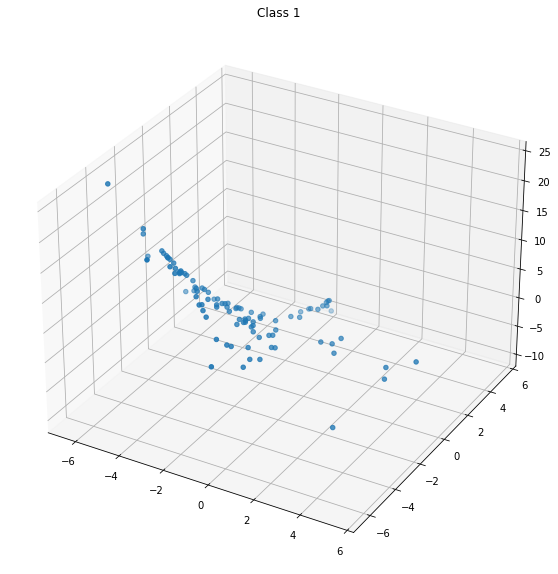

In [8]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(x_1_hat[:, 0], x_1_hat[:, 1], x_1_hat[:, 2])
plt.title('Class 1')
plt.xlim([-7, 6])
plt.ylim([-7, 6])

(-7.0, 6.0)

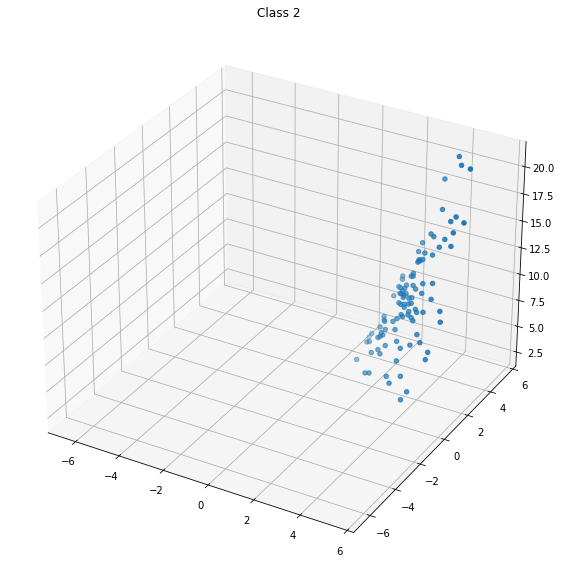

In [9]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(x_2_hat[:, 0], x_2_hat[:, 1], x_2_hat[:, 2])
plt.title('Class 2')
plt.xlim([-7, 6])
plt.ylim([-7, 6])

It looks like this data may be linearly separable in higher dimensions.

### Part 3

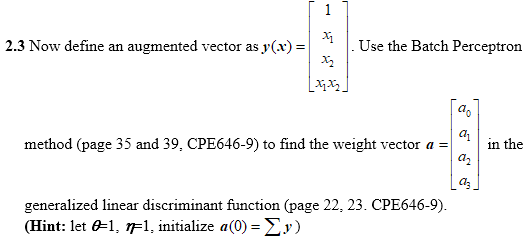

Here the data is mapped to 4D using the function below.

In [10]:
def mapping_to_4D(x, n):
    y = np.zeros((n, 4))
    for i in range(n):
        y[i][0] = 1
        y[i][1] = x[i][0]
        y[i][2] = x[i][1]
        y[i][3] = x[i][0] * x[i][1]
    return y

The samples for one of the samples has its signs flipped. This normalizes the data, allowing us to have a single objective function as seen in the picture below.

We will be using the **Batch Perceptron** method to find a separating vector that could be used to separate the 2 classes of data.

In [11]:
class_1_samples = hw4_2_1.T * -1    # flip the sign of one of the classes
class_2_samples = hw4_2_2.T

In [12]:
y_1 = mapping_to_4D(class_1_samples, n)
y_2 = mapping_to_4D(class_2_samples, n)

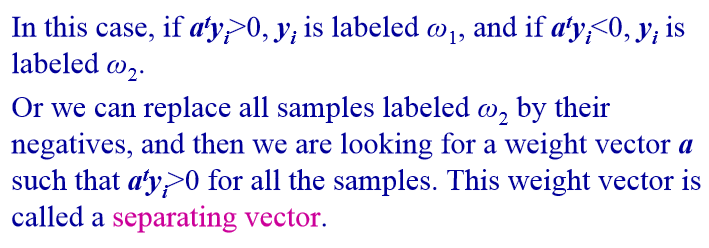

In [13]:
y = np.vstack((y_1, y_2))    # combine the 2 matrices into 1

In [14]:
a = np.sum(y, axis = 0).reshape(-1, 1)    # initial a vector with summation of y
a

array([[ 200.        ],
       [ 502.96920533],
       [ 466.58252635],
       [1340.04919496]])

The function below is used to calculate the current error. It should decrease as the number of iterations increases and eventually reach a threshold where the algorithm will stop.

In [15]:
def square_root_of_squares(learning_rate, y_summation):
    return np.sqrt((learning_rate * y_summation).T @ (learning_rate * y_summation))

Below is the main loop for the Batch Perceptron algorithm. 

It will first calculate the discriminant. It then goes over every value in the discriminant and finds any negative values. If it finds a negative value the corresponding y vector is added to the summation used in the a vector udpate step. The negative values are the misclassified samples - the number of them is printed. Next the error is calculated using the function above. Finally, the a vector is updated using the following formula:

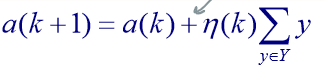

This repeats until the error is less than the threshold (currently set to 1).

In [16]:
# Main Loop

num_iterations = 100
threshold = 1
learning_rate = 1

for i in range(num_iterations):
    print('----------')
    print(f'Iteration - {i + 1}')
    
    # Compute discriminant
    g = a.T @ y.T   
    
    # Loop over all values in discriminant to find the negatives
    # The negative vectors are the misclassified samples for the current discriminant
    y_summation = np.zeros((4, 1))
    negative_count = 0
    for i in range(g.shape[1]):
        if g[0][i] < 0:    # if g value is negative
            y_summation += y[i].reshape(-1, 1)    # add corresponding y vector to summation
            negative_count += 1    # increase count 
    
    print(f'Misclassified Samples: {negative_count}')
    
    # Calculate error
    error = square_root_of_squares(learning_rate, y_summation)
    print(f'Error: {error[0][0]:.2f}')    # get the value to print
    
    # Stop loop if threshold reached
    if error < threshold:
        print('----------')
        print('Threshold reached!')
        print('----------')
        break
    
    # Update a vector
    a = a + learning_rate * y_summation
    print(a)

----------
Iteration - 1
Misclassified Samples: 21
Error: 53.30
[[ 221.        ]
 [ 492.87035952]
 [ 443.1936613 ]
 [1298.20285461]]
----------
Iteration - 2
Misclassified Samples: 21
Error: 53.30
[[ 242.        ]
 [ 482.7715137 ]
 [ 419.80479625]
 [1256.35651427]]
----------
Iteration - 3
Misclassified Samples: 21
Error: 53.30
[[ 263.        ]
 [ 472.67266789]
 [ 396.41593119]
 [1214.51017392]]
----------
Iteration - 4
Misclassified Samples: 21
Error: 53.30
[[ 284.        ]
 [ 462.57382208]
 [ 373.02706614]
 [1172.66383358]]
----------
Iteration - 5
Misclassified Samples: 21
Error: 53.30
[[ 305.        ]
 [ 452.47497627]
 [ 349.63820109]
 [1130.81749324]]
----------
Iteration - 6
Misclassified Samples: 21
Error: 53.30
[[ 326.        ]
 [ 442.37613045]
 [ 326.24933603]
 [1088.97115289]]
----------
Iteration - 7
Misclassified Samples: 21
Error: 53.30
[[ 347.        ]
 [ 432.27728464]
 [ 302.86047098]
 [1047.12481255]]
----------
Iteration - 8
Misclassified Samples: 21
Error: 53.30
[[ 36

Above we can see that after 43 iterations the algorithm was able to find a separating vector that completely separates the 2 classes. This means that in 4D the data is in fact linearly separable.

Of note, adjusting the learning rate changes the amount of iterations needed. In particular, increasing it to 1.5 cuts the number of iterations needed in half.